In [1]:
!pip uninstall -y transformers
!pip install transformers==4.44.2

Found existing installation: transformers 4.53.3
Uninstalling transformers-4.53.3:
  Successfully uninstalled transformers-4.53.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 88.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 73.8 MB/s eta 0:00:00:00:01
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 1.0.0rc2
    Uninstalling huggingface-hub-1.0.0rc2:
      Successfully uninstalled huggingface-hub-1.0.0rc2
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.2
    Uninstalling tokenizers-0.21.2:
      Successfully uninstalled tokenizers-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency confli

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from PIL import Image
from io import BytesIO
from tqdm.notebook import tqdm
import pathlib
import re

DATA_PATH = "/kaggle/input/resources1"
OUTPUT_PATH = "/kaggle/working/"
TRAIN_IMAGE_DIR = os.path.join(OUTPUT_PATH, "train_images")
TEST_IMAGE_DIR = os.path.join(OUTPUT_PATH, "test_images")

os.makedirs(TRAIN_IMAGE_DIR, exist_ok=True)
os.makedirs(TEST_IMAGE_DIR, exist_ok=True)


In [3]:
import os # Ensure os is imported
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup
from torch.optim import AdamW  # <-- Use AdamW from torch.optim
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import os
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from scipy.sparse import hstack, csr_matrix
import lightgbm as lgb
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import xgboost as xgb


!pip install -q accelerate datasets


MODEL_NAME = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)


print("Libraries imported.")


2025-10-11 07:25:57.097868: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760167557.349249      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760167557.419613      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 41.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.5 MB/s eta 0:00:00:00:0100:01
ERROR: pip's d

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:551: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Libraries imported.


In [12]:
from datasets import Dataset
import pandas as pd

df = pd.DataFrame({"text": ["hello world", "transformers work!"], "label": [0, 1]})
dataset = Dataset.from_pandas(df)
print(dataset)


Dataset({
    features: ['text', 'label'],
    num_rows: 2
})


In [4]:
try:
    train_df = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
    test_df = pd.read_csv(os.path.join(DATA_PATH, "test.csv"))
    print(f"Training data shape: {train_df.shape}")
    print(f"Testing data shape: {test_df.shape}")
except FileNotFoundError:
    train_df = pd.DataFrame()
    test_df = pd.DataFrame()

display(train_df.head())
train_df.info()


Training data shape: (75000, 4)
Testing data shape: (75000, 3)


,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


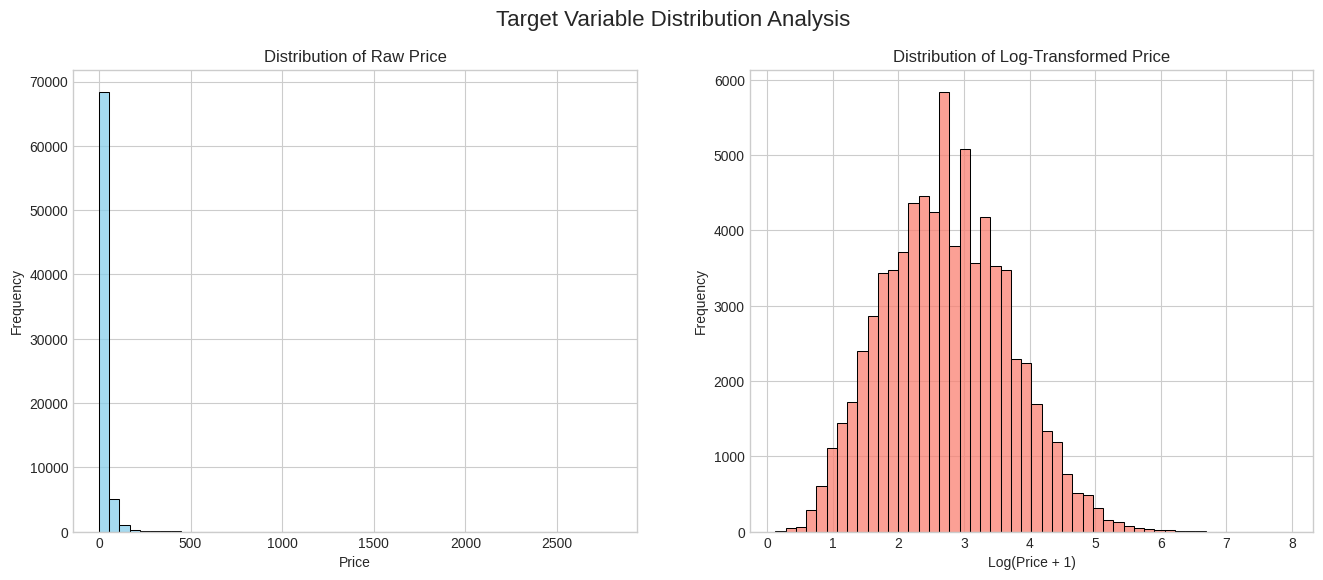

In [5]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(train_df['price'], bins=50, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Raw Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

train_df['log_price'] = np.log1p(train_df['price'])

sns.histplot(train_df['log_price'], bins=50, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Log-Transformed Price')
axes[1].set_xlabel('Log(Price + 1)')
axes[1].set_ylabel('Frequency')

plt.suptitle('Target Variable Distribution Analysis', fontsize=16)
plt.show()


In [6]:

for i in range(5):
    print(f"Sample {i+1}:")
    print(train_df['catalog_content'].iloc[i])
    print("-" * 30)

import re
pattern = r"\(Pack of (\d+)\)"

for i in range(15):
    text = train_df['catalog_content'].iloc[i]
    match = re.search(pattern, text, re.IGNORECASE)
    if match:
        print(f"Found IPQ: {match.group(1)} in text: '{text[:80]}...'")


Sample 1:
Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)
Value: 72.0
Unit: Fl Oz

------------------------------
Sample 2:
Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)
Bullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter
Bullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total
Bullet Point 3: Occasion Perfect: Delicious cookies for birthdays, weddings, anniversaries
Bullet Point 4: Shareable Treats: Fun to give and enjoy with friends and family
Bullet Point 5: Salerno Brand: Trusted brand of delicious butter cookies since 1925
Value: 32.0
Unit: Ounce

------------------------------
Sample 3:
Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)
Bullet Point 1: Loaded with hearty long grain wild rice and vegetables
Bullet Point 2: Full of hearty goodness
Bullet Point 3: Single serve bowls
Bullet Point 4: Easy to prepare mix
Bullet Point 5: 0 grams trans fat


In [7]:

train_df = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
test_df = pd.read_csv(os.path.join(DATA_PATH, "test.csv"))
train_df['log_price'] = np.log1p(train_df['price'])

def extract_features(text):
    if not isinstance(text, str):
        text = ""

    features = {
        'pack_quantity': None,
        'weight_oz': None,
        'item_count': None,
        'total_weight_oz': None
    }

    pack_match = re.search(r'\(Pack of (\d+)\)', text, re.IGNORECASE)
    count_match = re.search(r'(\d+)\s*(?:Count|ct|pcs)', text, re.IGNORECASE)
    oz_match = re.search(r'(\d+\.?\d*)\s*(?:Ounce|OZ)', text, re.IGNORECASE)
    lb_match = re.search(r'(\d+\.?\d*)\s*(?:Pound|lb)', text, re.IGNORECASE)

    if pack_match:
        features['pack_quantity'] = int(pack_match.group(1))

    if count_match:
        features['item_count'] = int(count_match.group(1))

    weight_oz = 0
    if oz_match:
        weight_oz = float(oz_match.group(1))
        features['weight_oz'] = weight_oz
    if lb_match:
        weight_oz += float(lb_match.group(1)) * 16

    if weight_oz > 0:
        pack_qty = features['pack_quantity'] if features['pack_quantity'] else 1
        features['total_weight_oz'] = weight_oz * pack_qty

    return features

train_features = train_df['catalog_content'].apply(lambda x: pd.Series(extract_features(x)))
train_df = pd.concat([train_df, train_features], axis=1)

test_features = test_df['catalog_content'].apply(lambda x: pd.Series(extract_features(x)))
test_df = pd.concat([test_df, test_features], axis=1)

feature_cols = ['pack_quantity', 'weight_oz', 'item_count', 'total_weight_oz']

train_df['pack_quantity'].fillna(1, inplace=True)
test_df['pack_quantity'].fillna(1, inplace=True)
train_df['item_count'].fillna(1, inplace=True)
test_df['item_count'].fillna(1, inplace=True)

train_df[feature_cols] = train_df[feature_cols].fillna(0)
test_df[feature_cols] = test_df[feature_cols].fillna(0)

print("\nFeatures extracted and added:")
display(train_df[['catalog_content'] + feature_cols].head())



Features extracted and added:


/tmp/ipykernel_37/995160984.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['pack_quantity'].fillna(1, inplace=True)
/tmp/ipykernel_37/995160984.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,catalog_content,pack_quantity,weight_oz,item_count,total_weight_oz
0,"Item Name: La Victoria Green Taco Sauce Mild, ...",6.0,12.00,1.0,72.00
1,"Item Name: Salerno Cookies, The Original Butte...",4.0,8.00,1.0,32.00
2,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",6.0,1.90,1.0,11.40
3,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,1.0,11.25,1.0,11.25
4,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",1.0,12.70,1.0,12.70


In [16]:
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from scipy.sparse import hstack, csr_matrix
import lightgbm as lgb
import numpy as np

def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

print("Vectorizing text with TF-IDF...")
tfidf = TfidfVectorizer(
    ngram_range=(1, 3),
    stop_words='english',
    min_df=3,
    max_df=0.9,
    max_features=20000
)
X_text_train = tfidf.fit_transform(train_df['catalog_content'])
X_text_test = tfidf.transform(test_df['catalog_content'])

print("Combining text features with numerical features...")
numerical_train = csr_matrix(train_df[feature_cols].values)
numerical_test = csr_matrix(test_df[feature_cols].values)

X_train_full = hstack([X_text_train, numerical_train])
X_test_full = hstack([X_text_test, numerical_test])

y_train_log = train_df['log_price'].values

print("Training LightGBM with 5-fold CV...")
NFOLDS = 5
kf = KFold(n_splits=NFOLDS, shuffle=True, random_state=42)

oof_preds = np.zeros(len(train_df))
test_preds = np.zeros(len(test_df))

params = {
    'objective': 'regression_l1',
    'metric': 'mae',
    'n_estimators': 2000,
    'learning_rate': 0.02,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'num_leaves': 31,
    'verbose': -1,
    'n_jobs': -1,
    'seed': 42,
    'boosting_type': 'gbdt',
}
import joblib
import os







Vectorizing text with TF-IDF...
Combining text features with numerical features...
Training LightGBM with 5-fold CV...
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


In [ ]:
import joblib
import os
os.makedirs("/kaggle/working/models", exist_ok=True)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full)):
    print(f"Fold {fold + 1}")
    X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
    y_train, y_val = y_train_log[train_idx], y_train_log[val_idx]

    model = lgb.LGBMRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='mae',
        callbacks=[lgb.early_stopping(100, verbose=False)]
    )

    # Save model
    model_path = f"models/lgb_fold{fold+1}.pkl"
    joblib.dump(model, model_path)
    print(f"Model for fold {fold + 1} saved at {model_path}")

    # Store predictions
    oof_preds[val_idx] = model.predict(X_val)
    test_preds += model.predict(X_test_full) / NFOLDS
score = smape(y_true_exp, oof_preds_exp)
with open("metrics.txt", "w") as f:
    f.write(f"SMAPE: {score:.4f}\n")
print(f"Final SMAPE: {score:.4f}")

oof_preds_exp = np.expm1(oof_preds)
y_true_exp = np.expm1(y_train_log)
score = smape(y_true_exp, oof_preds_exp)+++

import pandas as pd

# Exponential transformation back to price space
oof_preds_exp = np.expm1(oof_preds)
test_preds_exp = np.expm1(test_preds)

# Create DataFrames
oof_df = pd.DataFrame({
    'id': train_df.index,
    'true_price': np.expm1(y_train_log),
    'pred_price': oof_preds_exp
})

test_pred_df = pd.DataFrame({
    'id': test_df.index,
    'pred_price': test_preds_exp
})

# Save as CSV files
oof_df.to_csv("oof_predictions.csv", index=False)
test_pred_df.to_csv("test_predictions.csv", index=False)

print("OOF and Test predictions saved to disk!")

In [9]:
# --- Step 1.3 (Final Version): Data Prep with Pure PyTorch ---
# This version avoids the 'datasets' library completely.

# We still need transformers for the model and tokenizer
# IMPORTANT: If you get an error on the next import, restart the session and run this cell again.


# 1. Reload Data and Features (necessary to ensure a clean state)
try:
    train_df = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
    test_df = pd.read_csv(os.path.join(DATA_PATH, "test.csv"))
    
    train_df['log_price'] = np.log1p(train_df['price'])
    
    # Assuming extract_features function is defined in a previous cell (Cell 12)
    train_features = train_df['catalog_content'].apply(lambda x: pd.Series(extract_features(x)))
    train_df = pd.concat([train_df, train_features], axis=1)
    test_features = test_df['catalog_content'].apply(lambda x: pd.Series(extract_features(x)))
    test_df = pd.concat([test_df, test_features], axis=1)
    
    feature_cols = ['pack_quantity', 'weight_oz', 'item_count', 'total_weight_oz']
    train_df['pack_quantity'].fillna(1, inplace=True)
    test_df['pack_quantity'].fillna(1, inplace=True)
    train_df['item_count'].fillna(1, inplace=True)
    test_df['item_count'].fillna(1, inplace=True)
    train_df[feature_cols] = train_df[feature_cols].fillna(0)
    test_df[feature_cols] = test_df[feature_cols].fillna(0)
    print("Data and features reloaded successfully.")
except Exception as e:
    print(f"An error occurred during data reloading: {e}")

# 2. Load Tokenizer and create the structured input string
MODEL_NAME = "distilbert-base-uncased" 
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
def create_transformer_input(row):
    pack_qty = round(row['pack_quantity'], 1)
    weight = round(row['total_weight_oz'], 1)
    item_count = round(row['item_count'], 1)
    feature_str = f"PACKS: {pack_qty} | WEIGHT_OZ: {weight} | COUNT: {item_count}"
    return f"{feature_str} {tokenizer.sep_token} {row['catalog_content']}"

train_df['transformer_input'] = train_df.apply(create_transformer_input, axis=1)
test_df['transformer_input'] = test_df.apply(create_transformer_input, axis=1)

# 3. Define a custom PyTorch Dataset
class PricePredictionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.float)
        }

# 4. Create a train/validation split
train_sub_df, val_sub_df = train_test_split(train_df, test_size=0.1, random_state=42)

# 5. Create Datasets and DataLoaders
BATCH_SIZE = 16

train_dataset = PricePredictionDataset(
    texts=train_sub_df['transformer_input'].tolist(),
    labels=train_sub_df['log_price'].tolist(),
    tokenizer=tokenizer
)
val_dataset = PricePredictionDataset(
    texts=val_sub_df['transformer_input'].tolist(),
    labels=val_sub_df['log_price'].tolist(),
    tokenizer=tokenizer
)
test_dataset = PricePredictionDataset(
    texts=test_df['transformer_input'].tolist(),
    labels=[0] * len(test_df), # Dummy labels
    tokenizer=tokenizer
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE * 2, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE * 2, shuffle=False, num_workers=2)

print("\nData preparation complete using pure PyTorch.")
print("The DataLoaders are now ready for training.")

/tmp/ipykernel_37/2644931410.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['pack_quantity'].fillna(1, inplace=True)
/tmp/ipykernel_37/2644931410.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

Data and features reloaded successfully.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



Data preparation complete using pure PyTorch.
The DataLoaders are now ready for training.


In [ ]:
import pandas as pd

# Exponential transformation back to price space
oof_preds_exp = np.expm1(oof_preds)
test_preds_exp = np.expm1(test_preds)

# Create DataFrames
oof_df = pd.DataFrame({
    'id': train_df.index,
    'true_price': np.expm1(y_train_log),
    'pred_price': oof_preds_exp
})

test_pred_df = pd.DataFrame({
    'id': test_df.index,
    'pred_price': test_preds_exp
})

# Save as CSV files
oof_df.to_csv("oof_predictions.csv", index=False)
test_pred_df.to_csv("test_predictions.csv", index=False)

print("OOF and Test predictions saved to disk!")

In [13]:


def create_transformer_input(row):
    pack_qty = round(row['pack_quantity'], 1)
    weight = round(row['total_weight_oz'], 1)
    item_count = round(row['item_count'], 1)
    feature_str = f"PACKS: {pack_qty} | WEIGHT_OZ: {weight} | COUNT: {item_count}"
    return f"{feature_str} {tokenizer.sep_token} {row['catalog_content']}"

train_df['transformer_input'] = train_df.apply(create_transformer_input, axis=1)
test_df['transformer_input'] = test_df.apply(create_transformer_input, axis=1)

print(train_df['transformer_input'].iloc[0])

train_dataset_hf = Dataset.from_pandas(train_df[['transformer_input', 'log_price']])
test_dataset_hf = Dataset.from_pandas(test_df[['transformer_input']])

def tokenize_function(examples):
    return tokenizer(examples["transformer_input"], truncation=True, max_length=256, padding="max_length")

print("Tokenizing datasets...")
tokenized_train_dataset = train_dataset_hf.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset_hf.map(tokenize_function, batched=True)

tokenized_train_dataset = tokenized_train_dataset.rename_column("log_price", "labels")

print("Transformer data preparation done.")


PACKS: 6.0 | WEIGHT_OZ: 72.0 | COUNT: 1.0 [SEP] Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)
Value: 72.0
Unit: Fl Oz

Tokenizing datasets...


Map:   0%|          | 0/75000 [00:00<?, ? examples/s]

Map:   0%|          | 0/75000 [00:00<?, ? examples/s]

Transformer data preparation done.


In [17]:
import numpy as np
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# Metric
def compute_metrics(eval_pred):
    preds, labels = eval_pred
    pred_prices = np.expm1(preds.flatten())
    true_prices = np.expm1(labels.flatten())
    return {"smape": smape(true_prices, pred_prices)}

# Load model
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=1)

# Training arguments with progress logging
training_args = TrainingArguments(
    output_dir="/kaggle/working/deberta_v3_finetuned",
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="steps",       # Log every few steps
    logging_steps=20,               # Adjust for more/less frequent logs
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model="smape",
    greater_is_better=False,
    fp16=True,
    report_to="none",               # Avoid wandb or others
)

# Train/validation split
train_eval_split = tokenized_train_dataset.train_test_split(test_size=0.1, seed=42)
train_subset = train_eval_split['train']
eval_subset = train_eval_split['test']

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_subset,
    eval_dataset=eval_subset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

# Training
print(" Starting transformer training...")
trainer.train()  # verbose=True is default for Trainer
print(" Training complete.")

# Test set prediction
print(" Predicting on test set...")
predictions = trainer.predict(tokenized_test_dataset)
test_preds_log_transformer = predictions.predictions.flatten()

# OOF predictions from eval subset
print(" Generating validation predictions...")
oof_preds_transformer_log = trainer.predict(eval_subset).predictions.flatten()

print(" Transformer predictions ready.")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


 Starting transformer training...


Epoch,Training Loss,Validation Loss,Smape
1,0.524100,0.463176,52.042884
2,0.406000,0.430459,48.693946


 Training complete.
 Predicting on test set...


 Generating validation predictions...


 Transformer predictions ready.


In [20]:

print("Loading image embeddings...")
try:
    train_img_embeds = np.load("/kaggle/input/resources1/train_image_embeddings.npy")
    test_img_embeds = np.load("/kaggle/input/resources1/test_image_embeddings.npy")
    
    print(f"Train embeddings shape: {train_img_embeds.shape}")
    print(f"Test embeddings shape: {test_img_embeds.shape}")
    import numpy as np

    if train_img_embeds.shape[0] < len(train_df):
        missing = len(train_df) - train_img_embeds.shape[0]
        pad = np.zeros((missing, train_img_embeds.shape[1]))
        train_img_embeds = np.vstack([train_img_embeds, pad])
        print(f"Padded train embeddings with {missing} zero row(s).")
    
    if test_img_embeds.shape[0] < len(test_df):
        missing = len(test_df) - test_img_embeds.shape[0]
        pad = np.zeros((missing, test_img_embeds.shape[1]))
        test_img_embeds = np.vstack([test_img_embeds, pad])
        print(f"Padded test embeddings with {missing} zero row(s).")
    
    print(train_img_embeds.shape, len(train_df))
    print(test_img_embeds.shape, len(test_df))

    assert train_img_embeds.shape[0] == len(train_df)
    assert test_img_embeds.shape[0] == len(test_df)

except FileNotFoundError:
    print("ERROR: Embedding files not found. Make sure Phase 0 ran successfully.")
    train_img_embeds = np.zeros((len(train_df), 512))  # Adjust 512 if needed
    test_img_embeds = np.zeros((len(test_df), 512))


Loading image embeddings...
Train embeddings shape: (74999, 512)
Test embeddings shape: (74999, 512)
Padded train embeddings with 1 zero row(s).
Padded test embeddings with 1 zero row(s).
(75000, 512) 75000
(75000, 512) 75000


In [ ]:

print("Recreating TF-IDF and numerical features...")
tfidf = TfidfVectorizer(ngram_range=(1, 3), stop_words='english', min_df=3, max_df=0.9, max_features=20000)
X_text_train = tfidf.fit_transform(train_df['catalog_content'])
X_text_test = tfidf.transform(test_df['catalog_content'])

numerical_train = csr_matrix(train_df[feature_cols].values)
numerical_test = csr_matrix(test_df[feature_cols].values)

from scipy.sparse import hstack, csr_matrix

print("Combining TF-IDF, numerical features, and image embeddings...")
X_train_multimodal = hstack([X_text_train, numerical_train, train_img_embeds])
X_test_multimodal = hstack([X_text_test, numerical_test, test_img_embeds])

# Convert to CSR so we can index by row
X_train_multimodal = X_train_multimodal.tocsr()
X_test_multimodal = X_test_multimodal.tocsr()

print(f"Multimodal training matrix shape: {X_train_multimodal.shape}")

print(f"Multimodal training matrix shape: {X_train_multimodal.shape}")

print("Training multimodal LightGBM with 5-fold CV...")
oof_preds_mm_lgbm = np.zeros(len(train_df))
test_preds_mm_lgbm = np.zeros(len(test_df))

NFOLDS = 5
kf = KFold(n_splits=NFOLDS, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_multimodal, y_train_log)):
    print(f"Fold {fold + 1}")
    X_train, X_val = X_train_multimodal[train_idx], X_train_multimodal[val_idx]
    y_train, y_val = y_train_log[train_idx], y_train_log[val_idx]

    model = lgb.LGBMRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='mae',
        callbacks=[lgb.early_stopping(100, verbose=False)]
    )

    oof_preds_mm_lgbm[val_idx] = model.predict(X_val)
    test_preds_mm_lgbm += model.predict(X_test_multimodal) / NFOLDS

oof_preds_mm_exp = np.expm1(oof_preds_mm_lgbm)
score = smape(y_true_exp, oof_preds_mm_exp)
print(f"\nOOF SMAPE for Multimodal LightGBM: {score:.4f}")



Recreating TF-IDF and numerical features...
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_37/1225546169.py", line 3, in <cell line: 0>
    X_text_train = tfidf.fit_transform(train_df['catalog_content'])
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py", line 2133, in fit_transform
    X = super().fit_transform(raw_documents)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py", li

In [23]:


print("Building Image-Only Ridge Model...")

scaler = StandardScaler()
X_train_img_scaled = scaler.fit_transform(train_img_embeds)
X_test_img_scaled = scaler.transform(test_img_embeds)

print("Training Image-Only Ridge with 5-fold CV...")
oof_preds_img_ridge = np.zeros(len(train_df))
test_preds_img_ridge = np.zeros(len(test_df))

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_img_scaled, y_train_log)):
    print(f"Fold {fold + 1}")
    X_train, X_val = X_train_img_scaled[train_idx], X_train_img_scaled[val_idx]
    y_train, y_val = y_train_log[train_idx], y_train_log[val_idx]

    model = Ridge(alpha=1.0, random_state=42)
    model.fit(X_train, y_train)

    oof_preds_img_ridge[val_idx] = model.predict(X_val)
    test_preds_img_ridge += model.predict(X_test_img_scaled) / NFOLDS

oof_preds_ridge_exp = np.expm1(oof_preds_img_ridge)
score = smape(y_true_exp, oof_preds_ridge_exp)
print(f"\nOOF SMAPE for Image-Only Ridge Model: {score:.4f}")

# Save predictions if needed:
# np.save('oof_img_ridge.npy', oof_preds_img_ridge)
# np.save('test_preds_img_ridge.npy', test_preds_img_ridge)


Building Image-Only Ridge Model...
Training Image-Only Ridge with 5-fold CV...
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5

OOF SMAPE for Image-Only Ridge Model: 72.9417


In [24]:


oof_preds_transformer_log = np.zeros(train_df.shape[0])


eval_indices = train_eval_split['test']._indices
validation_predictions = trainer.predict(eval_subset).predictions.flatten()
oof_preds_transformer_log[eval_indices] = validation_predictions


X_train_meta = np.column_stack([
    oof_preds,              
    oof_preds_transformer_log, 
    oof_preds_mm_lgbm,      
    oof_preds_img_ridge,    
    train_df[feature_cols].values 
])

X_test_meta = np.column_stack([
    test_preds,             
    test_preds_log_transformer,
    test_preds_mm_lgbm,     
    test_preds_img_ridge,   
    test_df[feature_cols].values 
])

print(f"Meta-model training data shape: {X_train_meta.shape}")
print(f"Meta-model test data shape: {X_test_meta.shape}")

y_train_meta = train_df['log_price'].values

print("\n--- Training the XGBoost Meta-Model ---")

meta_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50
)


from sklearn.model_selection import train_test_split
X_train_meta_train, X_train_meta_val, y_train_meta_train, y_train_meta_val = train_test_split(
    X_train_meta, y_train_meta, test_size=0.1, random_state=42
)

meta_model.fit(X_train_meta_train, y_train_meta_train,
               eval_set=[(X_train_meta_val, y_train_meta_val)],
               verbose=False)

print("Meta-model training complete.")



final_log_preds = meta_model.predict(X_test_meta)

final_prices = np.expm1(final_log_preds)

final_prices[final_prices < 0] = 0 

submission_df = pd.DataFrame({
    'sample_id': test_df['sample_id'],
    'price': final_prices
})

# Save to submission.csv
submission_path = os.path.join(OUTPUT_PATH, "submission.csv")
submission_df.to_csv(submission_path, index=False)

print(f"\nSubmission file created successfully at: {submission_path}")
display(submission_df.head())

Meta-model training data shape: (75000, 8)
Meta-model test data shape: (75000, 8)

--- Training the XGBoost Meta-Model ---
Meta-model training complete.

Submission file created successfully at: /kaggle/working/submission.csv


,sample_id,price
0,100179,13.923727
1,245611,16.493177
2,146263,21.658421
3,95658,10.213229
4,36806,32.491493
